In [38]:
#1 Collecte et Exploration des Données :
import pandas as pd
# Charger le dataset
dataset = pd.read_csv('Breast Cancer Wisconsin.csv')  
# Afficher les 5 premières lignes
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [40]:
#2 Prétraitement des Données :

## Supprimer la colonne 'id' si elle existe
if 'id' in dataset.columns:
    dataset = dataset.drop('id', axis=1)

# Supprimer la colonne vide 'Unnamed: 32' si elle existe
if 'Unnamed: 32' in dataset.columns:
    dataset = dataset.drop('Unnamed: 32', axis=1)

# Encodage de la variable cible (B=0, M=1)
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1})

# Voir combien il y a de chaque type
dataset['diagnosis'].value_counts()

# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(dataset.isnull().sum())

# Suppression des valeurs manquantes (après suppression de la colonne vide)
dataset = dataset.dropna()

# Suppression des doublons
dataset = dataset.drop_duplicates()

# Séparation des caractéristiques et de la cible
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensembles d'entraînement et de test  80% pour l'entraînement, 20% pour le test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

print("Taille ensemble d'entraînement :", X_train.shape)
print("Taille ensemble de test :", X_test.shape)

dataset = dataset.fillna(dataset.mean(numeric_only=True))

Valeurs manquantes par colonne :
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Taille ensemble d'entraînement : (455, 30)
Taille ensem

In [42]:
#3 Construction des Modèles

from sklearn.linear_model import SGDClassifier
# Création du modèle
log_reg = SGDClassifier(max_iter=1000, eta0=0.001) 
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier()

In [44]:
#4 Entraînement du modèle

log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

##Optimisation des hyperparamètres avec GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Meilleur k pour KNN :", grid.best_params_)

Meilleur k pour KNN : {'n_neighbors': 5}


----- Régression Logistique -----
Accuracy : 0.956140350877193
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



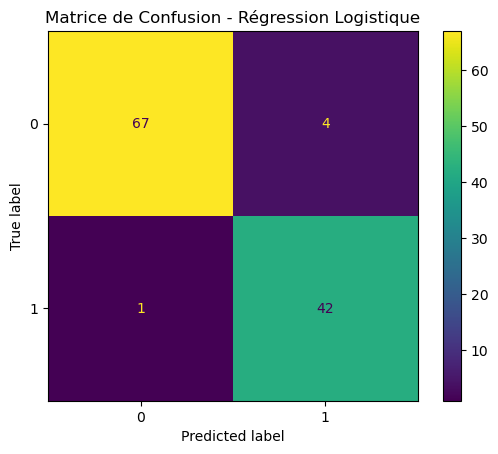

----- KNN (meilleur k) -----
Accuracy : 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



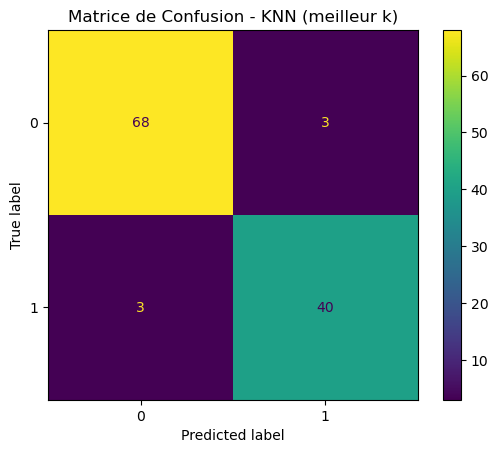

----- Arbre de Décision -----
Accuracy : 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



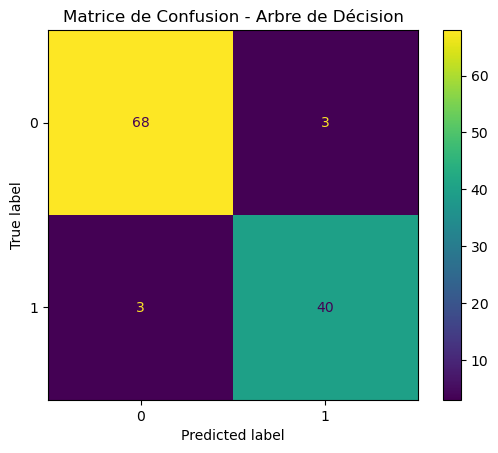

In [45]:
#5.Évaluation des performances
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dictionnaire des modèles à évaluer
models = {
    "Régression Logistique": log_reg,
    "KNN (meilleur k)": grid.best_estimator_,
    "Arbre de Décision": tree
}

# Boucle d'évaluation
for name, model in models.items():
    print(f"----- {name} -----")
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Affichage des scores
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Affichage de la matrice de confusion
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Matrice de Confusion - {name}")
    plt.show()


Caractéristiques les plus importantes (Arbre de Décision) :
         Caractéristique  Importance
7    concave points_mean    0.697695
27  concave points_worst    0.065651
20          radius_worst    0.052299
22       perimeter_worst    0.051494
1           texture_mean    0.038877
21         texture_worst    0.037046
19  fractal_dimension_se    0.018554
17     concave points_se    0.015931
13               area_se    0.011983
24      smoothness_worst    0.009233


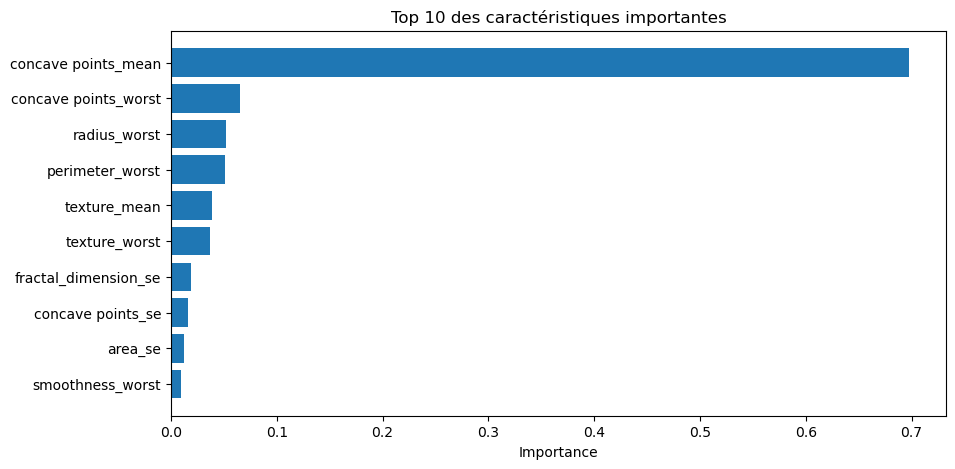

Caractéristiques influentes (Régression Logistique) :
         Caractéristique  Coefficient
21         texture_worst    14.803466
28        symmetry_worst    12.780893
16          concavity_se   -12.266002
26       concavity_worst    11.507955
10             radius_se    10.984658
13               area_se    10.903971
7    concave points_mean     9.228999
5       compactness_mean    -8.258486
6         concavity_mean     7.459309
27  concave points_worst     7.361086


In [47]:
#6.  Identifier les caractéristiques influentes
import pandas as pd
import matplotlib.pyplot as plt

# Récupération des importances pour Arbre de Décision
importances = tree.feature_importances_

# Création d’un DataFrame pour trier les caractéristiques par importance
feature_names = X.columns  # X doit être un DataFrame
importance_df = pd.DataFrame({
    'Caractéristique': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Affichage des 10 caractéristiques les plus importantes
print("Caractéristiques les plus importantes (Arbre de Décision) :")
print(importance_df.head(10))

# Visualisation
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Caractéristique'].head(10), importance_df['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 des caractéristiques importantes")
plt.xlabel("Importance")
plt.show()

# Récupération des coefficients pour Régression Logistique
coefficients = log_reg.coef_[0]  # un seul tableau car binaire

coeff_df = pd.DataFrame({
    'Caractéristique': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Affichage des 10 plus influentes
print("Caractéristiques influentes (Régression Logistique) :")
print(coeff_df.head(10))
